# Digital Image Processing 
### Spring 2024 
### Assignment 2
### Aisha Muhammad Nawaz (L20-0921)
###   BSCS 6B
#### Instructions:  
##### You are required to code the following algorithms using Matlab/Python languages. Proper GUI, where all relevant inputs are taken from the user and appropriate outputs are shown accordingly:

Implement following algorithms using appropriate GUI:

1. ACE filteing. 
2. Specified Histogram Equalization.

### Due Date: 20th March 2024

### NOTE: I am using Python Language
# Part 1 : ACE filtering 

In [1]:
# Part 1 : ACE Filtering
import cv2
import matplotlib.pyplot as plt
import numpy as np
def showResults(img,newImage,title):
    plt.subplot(121)
    plt.imshow(img,cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(newImage,cmap='gray')
    plt.title("Image After "+title)
    plt.axis('off')
    
    plt.show()
    
def ACEFiltering(img,n,k1,k2):
    
    meanEntireImage=np.mean(img) #Calculating average for entire image I(r,c)
    newImage = np.zeros_like(img) #Creating a copy of original image but all values are zero
    
    # Padding image using mirror method (So that border information is not lost) 
    paddedImage = cv2.copyMakeBorder(img, n//2, n//2, n//2, n//2, cv2.BORDER_REFLECT)
    
    for i in range(img.shape[0]):
        if i+n>=img.shape[0]:  # Check if window exceeds image boundary
            break
        for j in range(img.shape[1]):
            if j+n>=img.shape[1]:  # Check if window exceeds image boundary
                break
            subImage = paddedImage[i:i+n, j:j+n]
            meanLocalImage = np.mean(subImage)
            
            stdDev = (np.sum((subImage-meanLocalImage)**2)/(n*n-1))**0.5 #Local Standard Deviation in the current window
            
            if stdDev: #If Standard Deviation is non-zero, the center value in the new image is modified
                modifiedPixel = k1*(meanEntireImage/stdDev)*(paddedImage[i+(n//2), j+(n//2)] - meanLocalImage) + (k2*meanLocalImage)
                #To truncate fractional part, convert to int
                modifiedPixel=int(modifiedPixel)
                # Assuming modifiedPixel can be negative or greater than 255
                if modifiedPixel<0:
                      modifiedPixel = 256 + (modifiedPixel % 256)  # Convert to two's complement
                elif modifiedPixel>255:
                      modifiedPixel = modifiedPixel % 256  # Wrap around values above 255                     
                newImage[i+(n//2), j+(n//2)] = modifiedPixel  # Assign the modified pixel value
            else: #If Standard Deviation is Zero, the center value in the new image is copied as it is.
                # There's no variability in the intensity of the neighboring pixels (Its a flat/uniform region)
                newImage[i+(n//2), j+(n//2)] = paddedImage[i+(n//2), j+(n//2)] 
    return newImage

-> Please enter window size, n: 11
-> Please enter value of Local Gain Factor Constant, k1 (Between 0 and 1): 0.9
-> Please enter value of Local Mean Constant, k2 (Between 0 and 1): 0.1


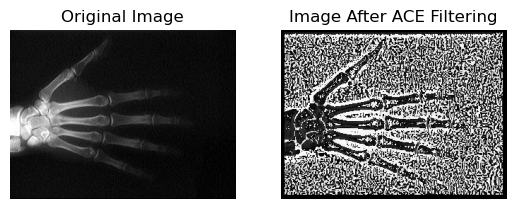

In [2]:
img=cv2.imread('testA.png',cv2.IMREAD_GRAYSCALE)
#Taking input from user for n (Window Size), k1 (Local Gain Factor Constant) & k2 (Local Mean Constant) values    
n=int(input('-> Please enter window size, n: ')) 
k1=float(input('-> Please enter value of Local Gain Factor Constant, k1 (Between 0 and 1): '))   
k2=float(input('-> Please enter value of Local Mean Constant, k2 (Between 0 and 1): ')) 
newImage=ACEFiltering(img,n,k1,k2)
showResults(img,newImage,'ACE Filtering') #Sample input: 11,0.9,0.1 

# Part 2 : Specified Histogram Equalization

In [3]:
# Part 2: Specified Histogram Equalization
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

def findHistEqualized(grayLevelValues):
    res={}
    #Step1: Finding Running Sum     
    runningSum=0
    for key,value in grayLevelValues.items():
        res[key]=runningSum+value
        runningSum=runningSum+value
        
    #Step2: Dividing the running sum values by total pixels
    maxPixelValue=max(grayLevelValues.keys())
    for key,value in res.items():
        res[key]=round((res[key]/runningSum)*maxPixelValue) #Step3: mulitplying ans of step 2 by max pixel value & round  
    return res
           
def findGrayLevelValues(img):
    grayLevelValues={}
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixelValue = img[i][j]
            if pixelValue<0: #Handling negative pixel values
                pixelValue = 256 + (pixelValue % 256)  # Converting to two's complement
            grayLevel = int(math.log2(pixelValue+1)) # Add 1 to avoid log(0) and ensure log2(1) = 0
            grayLevelValues.setdefault(grayLevel, 0)
            grayLevelValues[grayLevel] = grayLevelValues[grayLevel] + 1
    # Sorting the items of grayLevelValues dictionary
    grayLevelValues = dict(sorted(grayLevelValues.items()))
    return grayLevelValues

def findFinalMappedVersion(histogramA, histogramB):
    res = {}
    for keyA, valueA in histogramA.items():
        minDiff=float('inf')
        bestKeyB=None
        for keyB,valueB in histogramB.items():
            diff=abs(valueA - valueB)
            if diff < minDiff:
                minDiff = diff
                bestKeyB = keyB
        res[keyA] = bestKeyB
    return res

def mapImage(vals, img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixelValue = img[i][j]
            if pixelValue<0: #Handling negative pixel values
                pixelValue = 256 + (pixelValue % 256)  # Converting to two's complement
            grayLevel = int(math.log2(pixelValue+1)) # Add 1 to avoid log(0) and ensure log2(1) = 0
            img[i][j] = 2 ** vals[grayLevel]
    return img
def SpecifiedHistogramEqualization(img1,img2):    
    #Finding Gray Level Values & corresponding number of pixels in Reference Image (img1)
    grayLevelValues1=findGrayLevelValues(img1)
    #Finding Histogram Equalized Values of Reference Image (img1)
    histogramEqualized1=findHistEqualized(grayLevelValues1)
    
    #Finding Gray Level Values & corresponding number of pixels in Target Image (img2)
    grayLevelValues2=findGrayLevelValues(img2)
    #Finding Histogram Equalized Values of Target Image (img2)
    histogramEqualized2=findHistEqualized(grayLevelValues2)
    
    #Finally Mapping the values     
    finalAnswer=findFinalMappedVersion(histogramEqualized1,histogramEqualized2)
    modifiedImage=mapImage(finalAnswer,img1.copy())
    
    return modifiedImage
def showResultsWithHistogram(img1,img2,modifiedImage):
    plt.figure(figsize=(16, 12))  # To make images Larger
    plt.subplot(321)
    plt.imshow(img1, cmap='gray')
    plt.title("Reference Image")
    plt.axis('off')
       
    # Plotting the histogram
    plt.subplot(322)
    hist, bins = np.histogram(img1.flatten(), 256, [0, 256])
    plt.plot(hist, color='black')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Reference Image Histogram')

    plt.figure(figsize=(16, 12))   # To make images larger
    plt.subplot(323)
    plt.imshow(img2, cmap='gray')
    plt.title("Target Image")
    plt.axis('off')
    
    # Plotting the histogram
    plt.subplot(324)
    hist, bins = np.histogram(img2.flatten(), 256, [0, 256])
    plt.plot(hist, color='black')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Target Image Histogram')


    plt.figure(figsize=(16, 12))   # To make Images larger
    plt.subplot(325)
    plt.imshow(modifiedImage, cmap='gray')
    plt.title("Output Matched Image")
    plt.axis('off')
    
    # Plotting the histogram
    plt.subplot(326)
    hist, bins = np.histogram(modifiedImage.flatten(), 256, [0, 256])
    plt.plot(hist, color='black')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Output Matched Image Histogram')
    
    plt.show()

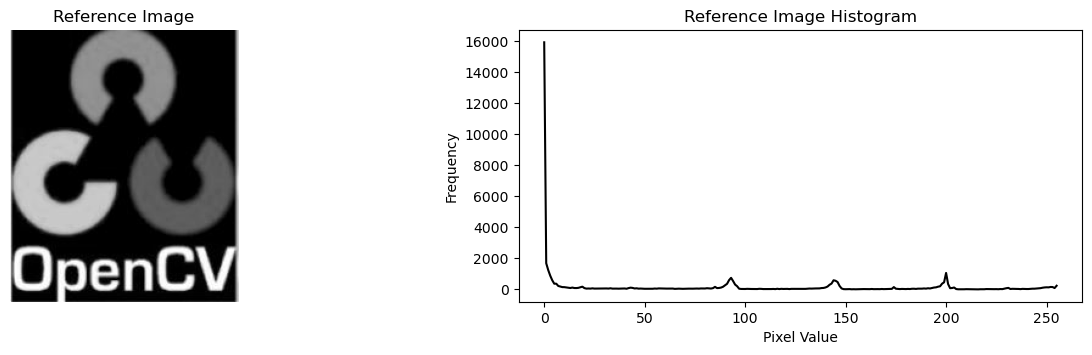

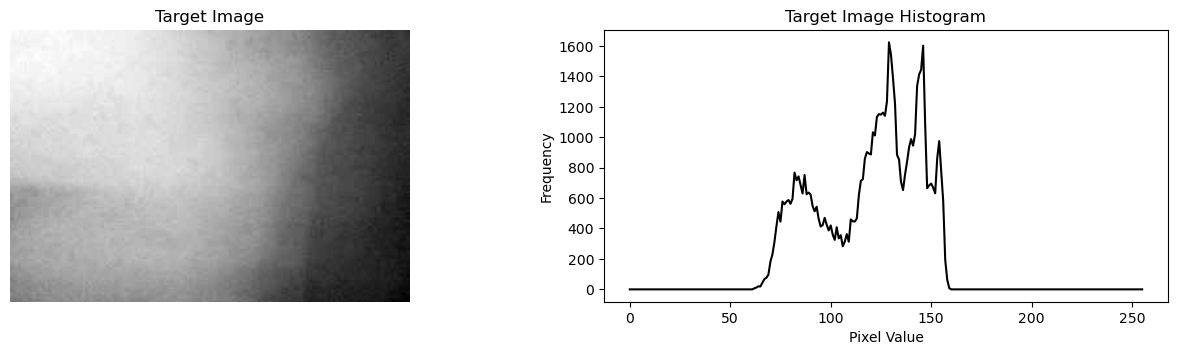

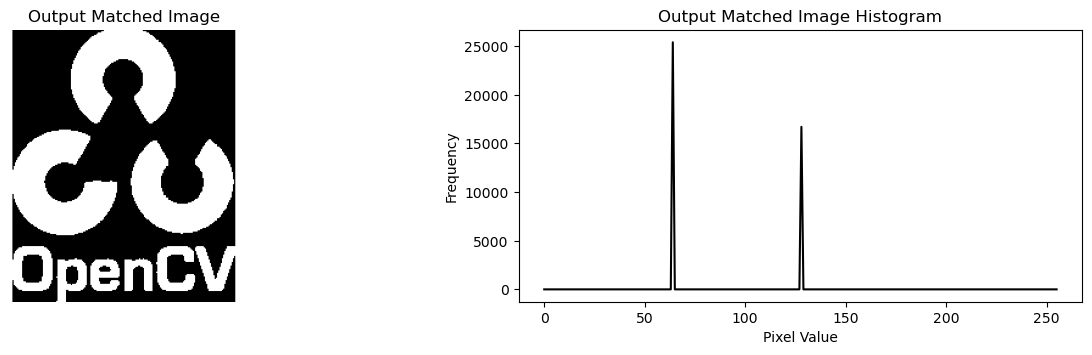

In [4]:
img1=cv2.imread('BA.JPG',cv2.IMREAD_GRAYSCALE)
img2=cv2.imread('BB.JPG',cv2.IMREAD_GRAYSCALE)
newImage=SpecifiedHistogramEqualization(img1,img2)
showResultsWithHistogram(img1,img2,newImage)

# FINAL GUI

In [5]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
import cv2
import numpy as np

# Using the functions provided above  ACEFiltering, SpecifiedHistogramEqualization

class ImageProcessorApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Image Processor")
        
        self.img1 = None
        self.img2 = None
        self.modified_img = None

        self.create_widgets()

    def create_widgets(self):
        self.label1 = tk.Label(self.master, text="Input Image")
        self.label1.grid(row=0, column=0)

        self.label2 = tk.Label(self.master, text="Target Image (for Histogram Equalization)")
        self.label2.grid(row=0, column=1)

        self.label3 = tk.Label(self.master, text="Resultant Image")
        self.label3.grid(row=0, column=2)

        self.canvas1 = tk.Canvas(self.master, width=400, height=400)
        self.canvas1.grid(row=1, column=0)

        self.canvas2 = tk.Canvas(self.master, width=400, height=400)
        self.canvas2.grid(row=1, column=1)

        self.canvas3 = tk.Canvas(self.master, width=400, height=400)
        self.canvas3.grid(row=1, column=2)

        self.btn_load_img1 = tk.Button(self.master, text="Load Input Image", command=self.load_img1)
        self.btn_load_img1.grid(row=2, column=0, pady=10)

        self.btn_load_img2 = tk.Button(self.master, text="Load Target Image", command=self.load_img2)
        self.btn_load_img2.grid(row=2, column=1, pady=10)

        self.label_k1 = tk.Label(self.master, text="k1 value:")
        self.label_k1.grid(row=3, column=0, pady=5)
        self.entry_k1 = tk.Entry(self.master)
        self.entry_k1.grid(row=3, column=1, pady=5)

        self.label_k2 = tk.Label(self.master, text="k2 value:")
        self.label_k2.grid(row=4, column=0, pady=5)
        self.entry_k2 = tk.Entry(self.master)
        self.entry_k2.grid(row=4, column=1, pady=5)

        self.label_n = tk.Label(self.master, text="n value:")
        self.label_n.grid(row=5, column=0, pady=5)
        self.entry_n = tk.Entry(self.master)
        self.entry_n.grid(row=5, column=1, pady=5)

        self.btn_process_ace = tk.Button(self.master, text="Process ACE Filtering", command=self.process_ace)
        self.btn_process_ace.grid(row=2, column=2, pady=10)

        self.btn_process_hist = tk.Button(self.master, text="Process Histogram Equalization", command=self.process_hist)
        self.btn_process_hist.grid(row=3, column=2, pady=10)

    def load_img1(self):
        file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg;*.jpeg;*.png")])
        if file_path:
            self.img1 = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            self.display_image(self.img1, self.canvas1)

    def load_img2(self):
        file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg;*.jpeg;*.png")])
        if file_path:
            self.img2 = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            self.display_image(self.img2, self.canvas2)

    def process_ace(self):
        if self.img1 is None:
            messagebox.showerror("Error", "Please load the reference image.")
            return

        k1 = float(self.entry_k1.get())
        k2 = float(self.entry_k2.get())
        n = int(self.entry_n.get())

        if not all([k1, k2, n]):
            messagebox.showerror("Error", "Please provide values for k1, k2, and n.")
            return

        self.modified_img = ACEFiltering(self.img1, n, k1, k2)
        self.display_image(self.modified_img, self.canvas3)

    def process_hist(self):
        if self.img1 is None or self.img2 is None:
            messagebox.showerror("Error", "Please load both images.")
            return

        self.modified_img = SpecifiedHistogramEqualization(self.img1, self.img2)
        self.display_image(self.modified_img, self.canvas3)

    def display_image(self, img, canvas):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(img)
        img = ImageTk.PhotoImage(img)

        canvas.img = img
        canvas.create_image(0, 0, anchor=tk.NW, image=img)

def main():
    root = tk.Tk()
    app = ImageProcessorApp(root)
    root.mainloop()

if __name__ == "__main__":
    main()